In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
train = ImageDataGenerator(rescale=1/255.)
validation = ImageDataGenerator(rescale=1/255.)

In [11]:
train_ds = train.flow_from_directory(
    '/content/drive/MyDrive/starters/train',
    color_mode='rgb',
    batch_size=32,
    target_size=(256,256),
    shuffle=True,
    seed=1
)
val_ds = validation.flow_from_directory(
    '/content/drive/MyDrive/starters/val',
    color_mode='rgb',
    batch_size=32,
    target_size=(256,256),
    shuffle=True,
    seed=1
)

Found 162 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


In [12]:
i = Input(shape=(256,256,3))
x = Conv2D(32, (3,3), activation='relu', padding = 'same')(i)
# x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding = 'same')(x)
# x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3,3), activation='relu', padding = 'same')(x)
# x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation = 'relu', padding='same')(x)
# x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(x)
# x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation = 'relu', padding= 'same')(x)
# x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)

x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4, activation='softmax')(x)
model = Model(i,x)

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model_fit = model.fit(train_ds, epochs=200, validation_data=val_ds)

Epoch 1/200
6/6 [==============================] - 63s 10s/step - loss: 2.4107 - accuracy: 0.2840 - val_loss: 1.3810 - val_accuracy: 0.2500
Epoch 2/200
6/6 [==============================] - 62s 10s/step - loss: 1.4181 - accuracy: 0.2901 - val_loss: 1.3587 - val_accuracy: 0.3000
Epoch 3/200
6/6 [==============================] - 61s 10s/step - loss: 1.3786 - accuracy: 0.2407 - val_loss: 1.3799 - val_accuracy: 0.2500
Epoch 4/200
6/6 [==============================] - 62s 10s/step - loss: 1.3515 - accuracy: 0.2654 - val_loss: 1.2586 - val_accuracy: 0.3500
Epoch 5/200
6/6 [==============================] - 64s 10s/step - loss: 1.2347 - accuracy: 0.3025 - val_loss: 1.1520 - val_accuracy: 0.3500
Epoch 6/200
6/6 [==============================] - 63s 10s/step - loss: 1.1540 - accuracy: 0.3889 - val_loss: 1.0235 - val_accuracy: 0.5000
Epoch 7/200
6/6 [==============================] - 61s 10s/step - loss: 1.0307 - accuracy: 0.5000 - val_loss: 1.1432 - val_accuracy: 0.4500
Epoch 8/200
6/6 [===

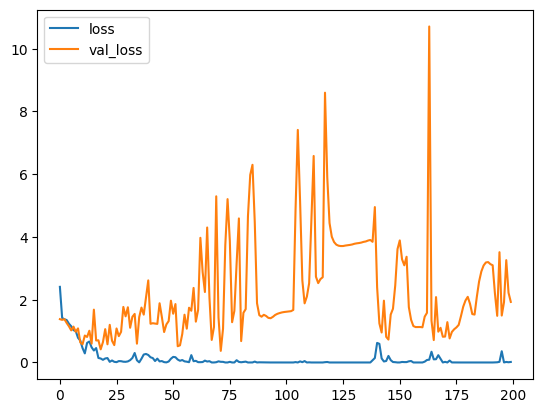

In [15]:
plt.plot(model_fit.history['loss'], label='loss')
plt.plot(model_fit.history['val_loss'], label = 'val_loss')
plt.legend()

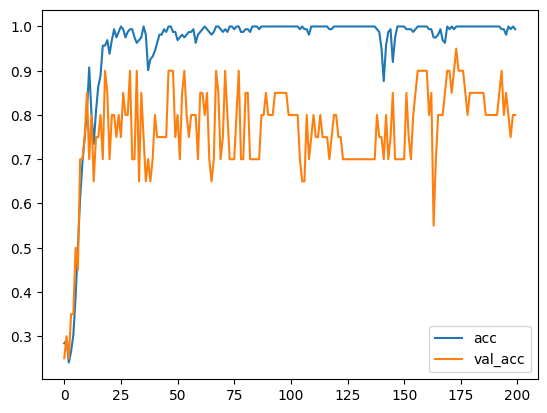

In [16]:
plt.plot(model_fit.history['accuracy'], label='acc')
plt.plot(model_fit.history['val_accuracy'], label='val_acc')
plt.legend()

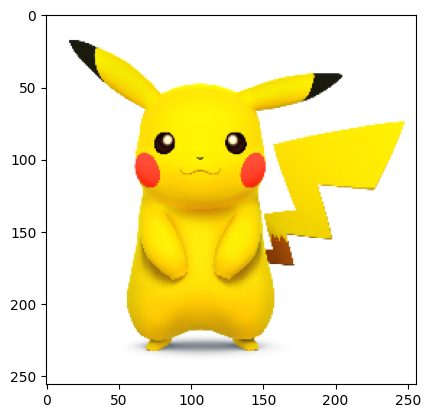

In [17]:
test_image = image.load_img('/content/drive/MyDrive/starters/test/Pikachu/00000004.jpg', target_size=(256,256))
plt.imshow(test_image)
plt.show()

In [18]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
prediction = model.predict(test_image).argmax(1)
prediction

1/1 [==============================] - 0s 382ms/step


array([2])

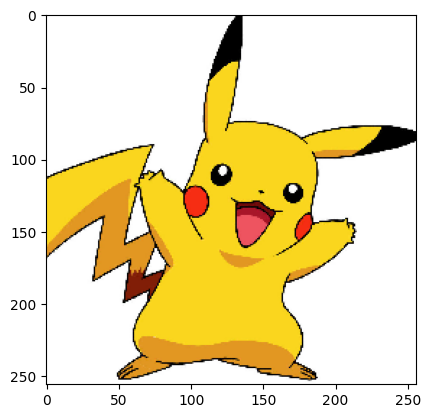

1/1 [==============================] - 0s 128ms/step
predict:  pikachu
true:  Pikachu


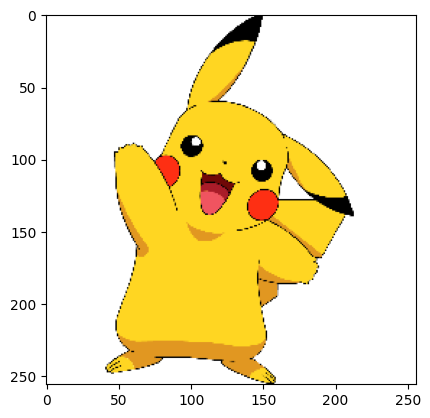

1/1 [==============================] - 0s 117ms/step
predict:  pikachu
true:  Pikachu


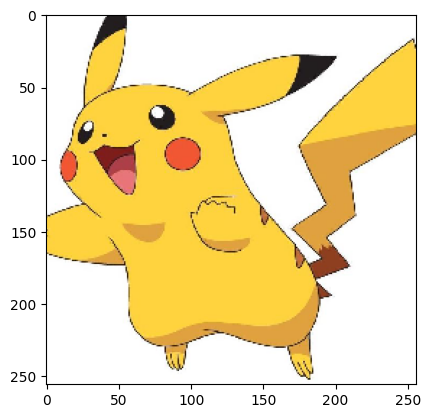

1/1 [==============================] - 0s 124ms/step
predict:  pikachu
true:  Pikachu


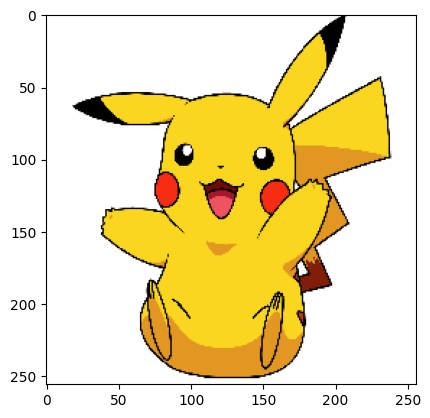

1/1 [==============================] - 0s 143ms/step
predict:  pikachu
true:  Pikachu


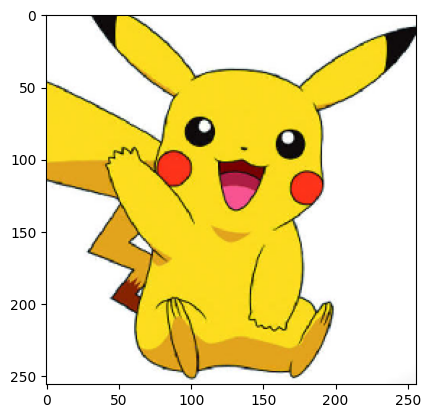

1/1 [==============================] - 0s 173ms/step
predict:  pikachu
true:  Pikachu


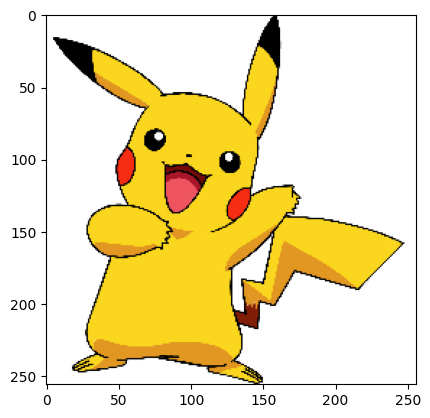

1/1 [==============================] - 0s 127ms/step
predict:  pikachu
true:  Pikachu


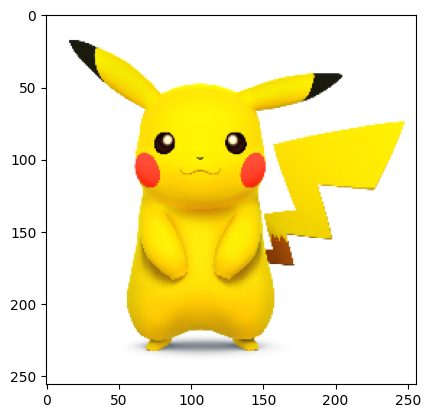

1/1 [==============================] - 0s 121ms/step
predict:  pikachu
true:  Pikachu


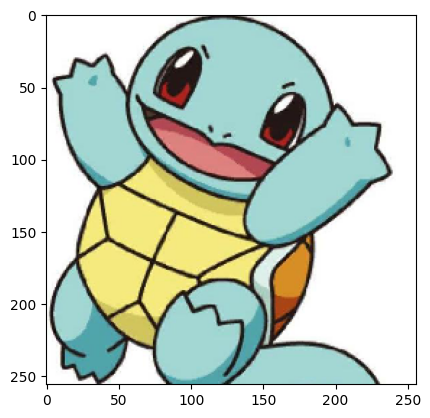

1/1 [==============================] - 0s 118ms/step
predict:  squirtle
true:  Squirtle


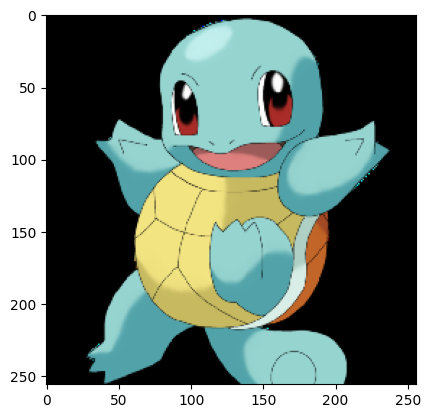

1/1 [==============================] - 0s 127ms/step
predict:  squirtle
true:  Squirtle


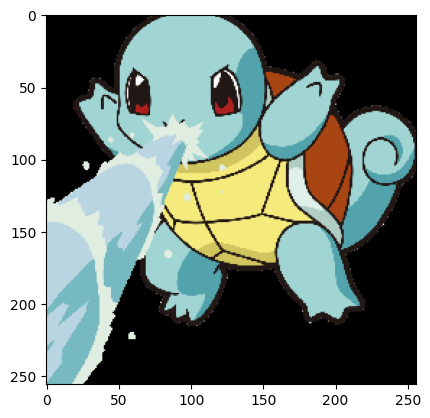

1/1 [==============================] - 0s 118ms/step
predict:  squirtle
true:  Squirtle


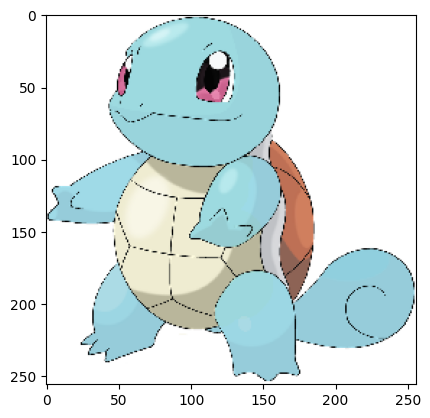

1/1 [==============================] - 0s 115ms/step
predict:  squirtle
true:  Squirtle


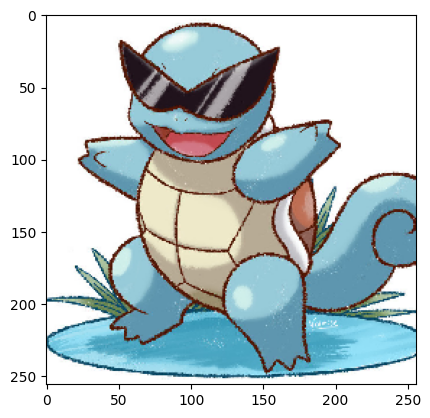

1/1 [==============================] - 0s 125ms/step
predict:  squirtle
true:  Squirtle


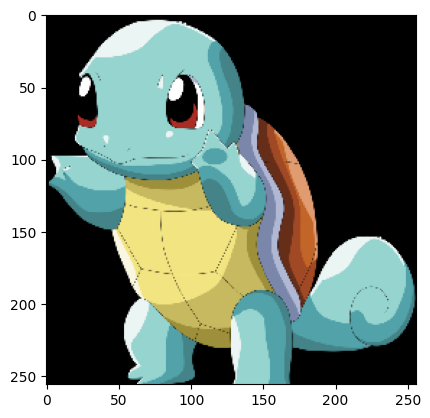

1/1 [==============================] - 0s 124ms/step
predict:  squirtle
true:  Squirtle


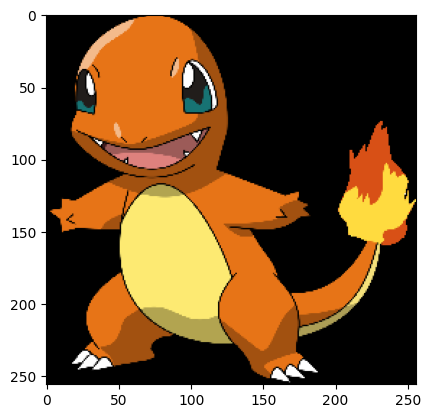

1/1 [==============================] - 0s 120ms/step
predict:  charmander
true:  Charmander


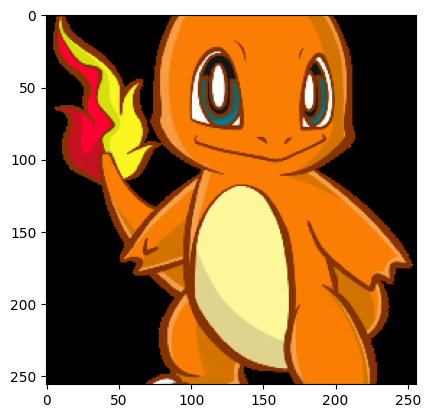

1/1 [==============================] - 0s 114ms/step
predict:  charmander
true:  Charmander


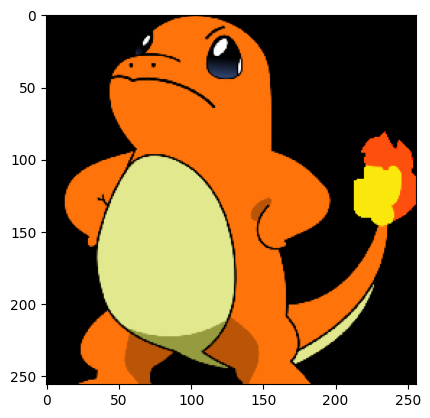

1/1 [==============================] - 0s 117ms/step
predict:  charmander
true:  Charmander


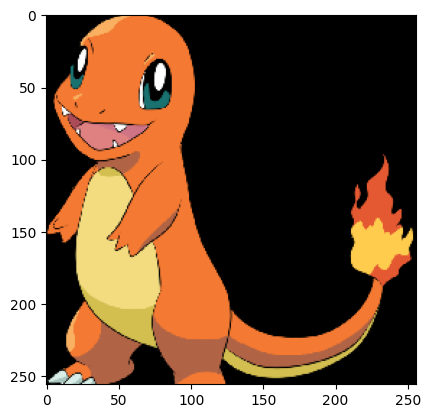

1/1 [==============================] - 0s 117ms/step
predict:  charmander
true:  Charmander


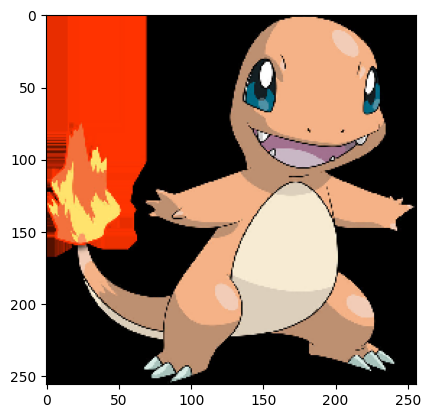

1/1 [==============================] - 0s 120ms/step
predict:  bulbasaur
true:  Charmander


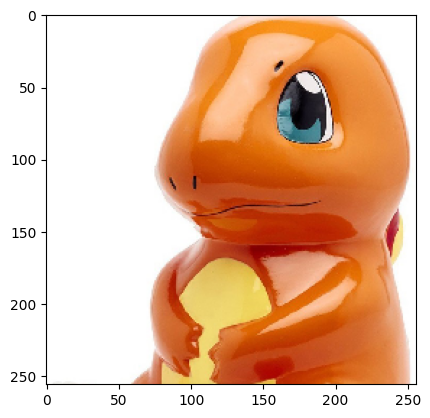

1/1 [==============================] - 0s 130ms/step
predict:  charmander
true:  Charmander


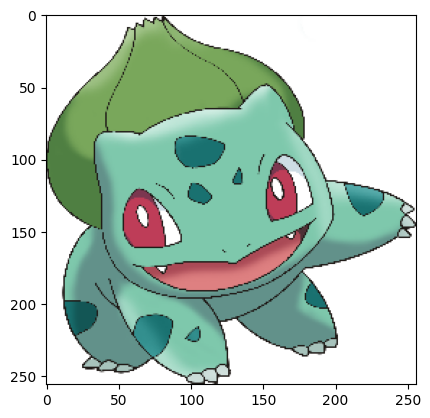

1/1 [==============================] - 0s 119ms/step
predict:  bulbasaur
true:  Bulbasaur


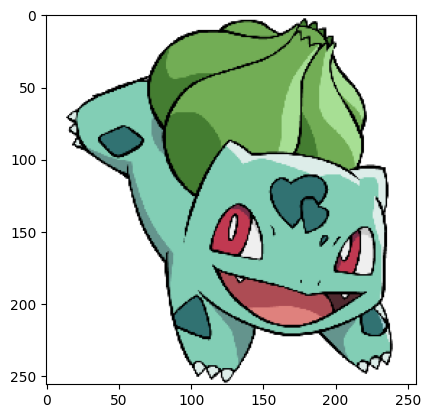

1/1 [==============================] - 0s 127ms/step
predict:  bulbasaur
true:  Bulbasaur


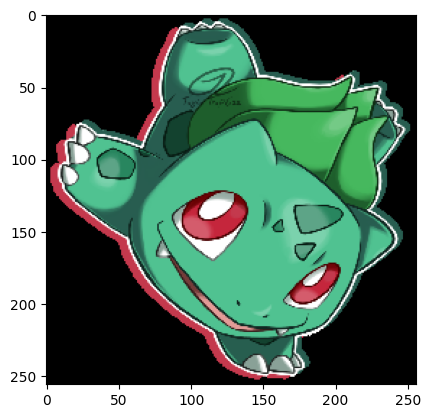

1/1 [==============================] - 0s 127ms/step
predict:  bulbasaur
true:  Bulbasaur


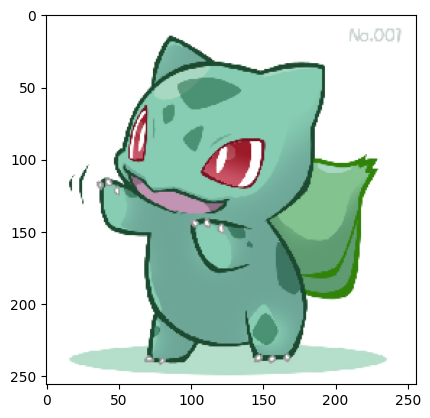

1/1 [==============================] - 0s 130ms/step
predict:  charmander
true:  Bulbasaur


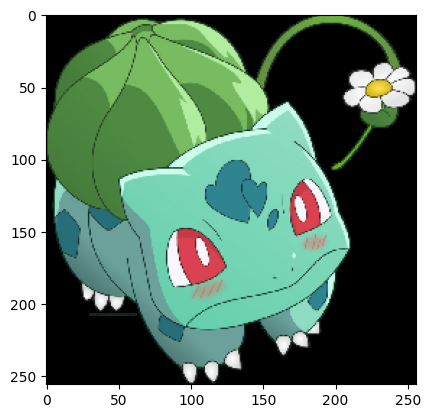

1/1 [==============================] - 0s 191ms/step
predict:  bulbasaur
true:  Bulbasaur


In [19]:
import os
dir_path = '/content/drive/MyDrive/starters/test'
true_list = []
prediction_list = []
for i in os.listdir(dir_path):
  for starter in os.listdir(dir_path+'/'+i):
    img = image.load_img(dir_path+'/'+i+'/'+starter, target_size=(256,256))
    plt.imshow(img)
    plt.show()
    true_list.append(i)

    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    predictions = model.predict(images).argmax(1)
    prediction_list.append(predictions)
    if predictions == 0:
      pokemon = 'bulbasaur'
    if predictions == 1:
      pokemon = 'charmander'
    if predictions == 2:
      pokemon = 'pikachu'
    if predictions == 3:
      pokemon = 'squirtle'
    print('predict: ', pokemon)
    print('true: ', i)

for i in range(len(true_list)):
  if true_list[i] == 'Squirtle':
    true_list[i] = 3
  if true_list[i] == 'Bulbasaur':
    true_list[i] = 0
  if true_list[i] == 'Charmander':
    true_list[i] = 1
  if true_list[i] == 'Pikachu':
    true_list[i] = 2

In [20]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

1/1 [==============================] - 0s 163ms/step
Confusion matrix, without normalization
[[4 1 0 0]
 [1 5 0 0]
 [0 0 7 0]
 [0 0 0 6]]


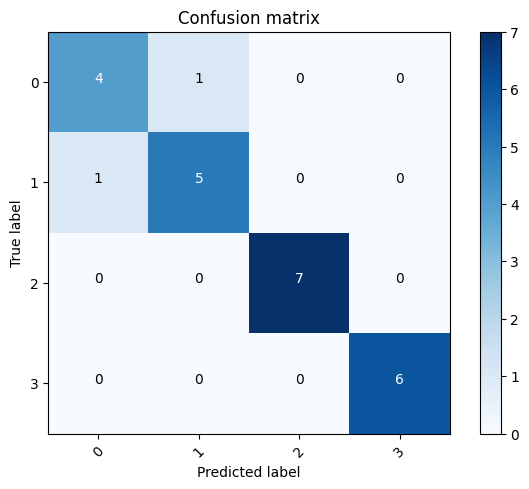

In [21]:
p_test = model.predict(images).argmax(axis=1)
cm = confusion_matrix(true_list, prediction_list)
plot_confusion_matrix(cm, list(range(4)))